In [24]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [25]:
# Load dataset
data = pd.read_csv('Electric Vehicle Population Data.csv')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232230 entries, 0 to 232229
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         232230 non-null  object 
 1   County                                             232226 non-null  object 
 2   City                                               232226 non-null  object 
 3   State                                              232230 non-null  object 
 4   Postal Code                                        232226 non-null  float64
 5   Model Year                                         232230 non-null  int64  
 6   Make                                               232230 non-null  object 
 7   Model                                              232230 non-null  object 
 8   Electric Vehicle Type                              232230 non-null  object

In [27]:
data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,2T3YL4DV0E,King,Bellevue,WA,98005.0,2014,TOYOTA,RAV4,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,103.0,0.0,41.0,186450183,POINT (-122.1621 47.64441),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
1,5YJ3E1EB6K,King,Bothell,WA,98011.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,1.0,478093654,POINT (-122.20563 47.76144),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
2,5UX43EU02S,Thurston,Olympia,WA,98502.0,2025,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,40.0,0.0,35.0,274800718,POINT (-122.92333 47.03779),PUGET SOUND ENERGY INC,5.306701e+10
3,JTMAB3FV5R,Thurston,Olympia,WA,98513.0,2024,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,260758165,POINT (-122.81754 46.98876),PUGET SOUND ENERGY INC,5.306701e+10
4,5YJYGDEE8M,Yakima,Selah,WA,98942.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,15.0,236581355,POINT (-120.53145 46.65405),PACIFICORP,5.307700e+10


In [28]:
data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,232226.000000,232230.000000,232203.000000,232203.000000,231749.000000,2.322300e+05,2.322260e+05
mean,98180.172044,2021.353727,46.755998,803.808973,28.880979,2.343671e+08,5.298177e+10
std,2489.407943,2.994884,84.373596,7246.597102,14.904503,6.831418e+07,1.507814e+09
min,1731.000000,1999.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2020.000000,0.000000,0.000000,17.000000,2.034737e+08,5.303301e+10
50%,98126.000000,2023.000000,0.000000,0.000000,32.000000,2.512717e+08,5.303303e+10
75%,98375.000000,2023.000000,38.000000,0.000000,42.000000,2.686943e+08,5.305307e+10
max,99577.000000,2025.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.602100e+10


In [29]:
# Checking for duplicated
data.duplicated().sum()

0

In [30]:
# Checking for missing values
data.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        27
Base MSRP                                             27
Legislative District                                 481
DOL Vehicle ID                                         0
Vehicle Location                                      11
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [32]:
# Filling missing numerical values with median
data['Electric Range'].fillna(data['Electric Range'].median(), inplace=True)
data['Base MSRP'].fillna(data['Base MSRP'].median(), inplace=True)
data['Legislative District'].fillna(data.groupby('City')['Legislative District'].transform(lambda x: x.fillna(x.median())), inplace=True)
data['2020 Census Tract'].fillna(data['2020 Census Tract'].median(), inplace=True)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_11456\3669534510.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Electric Range'].fillna(data['Electric Range'].median(), inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11456\3669534510.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

In [33]:
# Filling missing categorical values with mode
data['County'].fillna(data['County'].mode()[0], inplace=True)
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['Postal Code'].fillna(data.groupby('City')['Postal Code'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else df['Postal Code'].mode()[0])), inplace=True)
data['Electric Utility'].fillna(data['Electric Utility'].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11456\999275499.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['County'].fillna(data['County'].mode()[0], inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_11456\999275499.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [34]:
# Handling missing values in Vehicle Location
data['Vehicle Location'] = data['Vehicle Location'].fillna(data.groupby('City')['Vehicle Location'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown')))

In [35]:
# Checking for missing values
data.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 468
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      0
dtype: int64

In [37]:
# Handling missing values Legislative District
data['Legislative District'].fillna(data['Legislative District'].median(), inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_11456\3027930700.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Legislative District'].fillna(data['Legislative District'].median(), inplace=True)


In [38]:
# Checking for missing values
data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

<Figure size 1200x800 with 0 Axes>

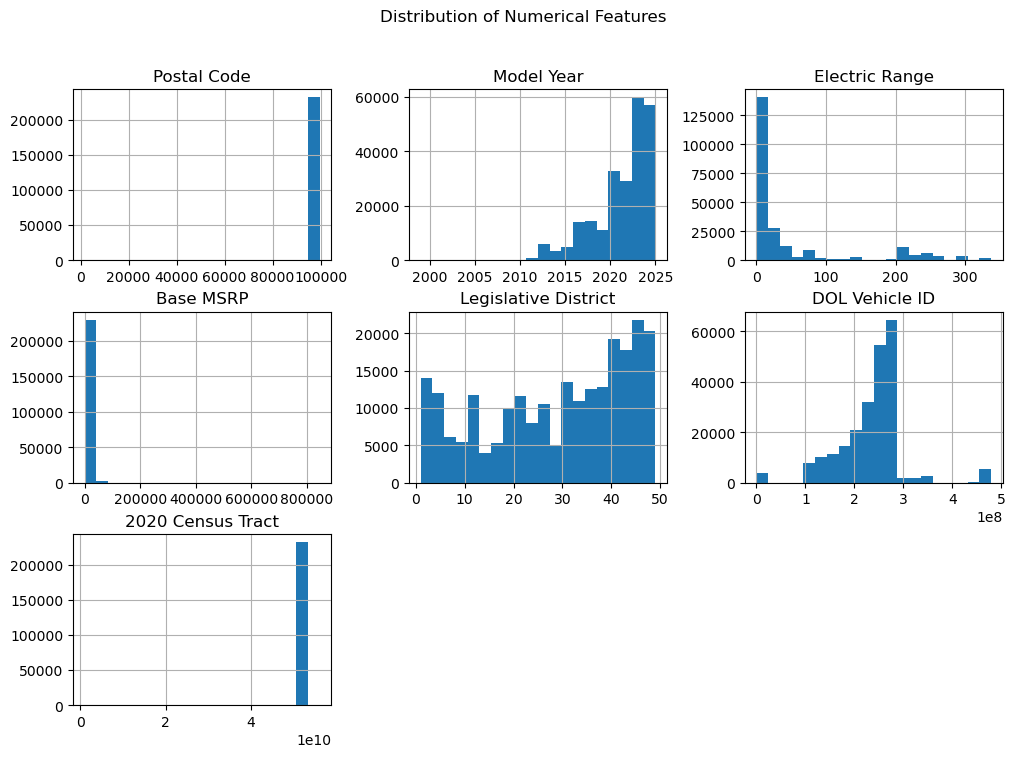

In [39]:
# Visualizing distribution of numerical features
numerical_cols = data.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
data[numerical_cols].hist(bins=20, figsize=(12, 8), layout=(len(numerical_cols)//3 + 1, 3))
plt.suptitle("Distribution of Numerical Features")
plt.show()


# Analisa Distribusi grafik diatas :
1. Postal Code & 2020 Census Tract
   - Distribusi terlihat terkonsentrasi disatu titik dengan nilai yang sangat tinggi.
2. Model Year
   - Distribusi menunjukan peningkatan jumlah kendaran listrik dari tahun 2010 - 2015.
3. Electric Range
   - Distribusi cenderung positif skewed, menunjukkan bahwa sebagian besar kendaraan memiliki jarak tempuh listrik yang lebih pendek, dengan beberapa kendaraan yang memiliki jangkauan sangat tinggi.
4. Base MSRP
   - Distribusi cenderung positif skewed, menunjukkan bahwa sebagian besar kendaraan memiliki jarak tempuh listrik yang lebih pendek, dengan beberapa kendaraan yang memiliki jangkauan sangat tinggi.
5. Legislative District
   - Distribusi cukup merata, menunjukkan bahwa kendaraan listrik tersebar di berbagai distrik legislatif.
6. DOL Vehicle ID
   - ID kendaraan tampaknya memiliki distribusi yang menunjukkan pola pengelompokan tertentu, yang mungkin mencerminkan batch atau seri produksi kendaraan.

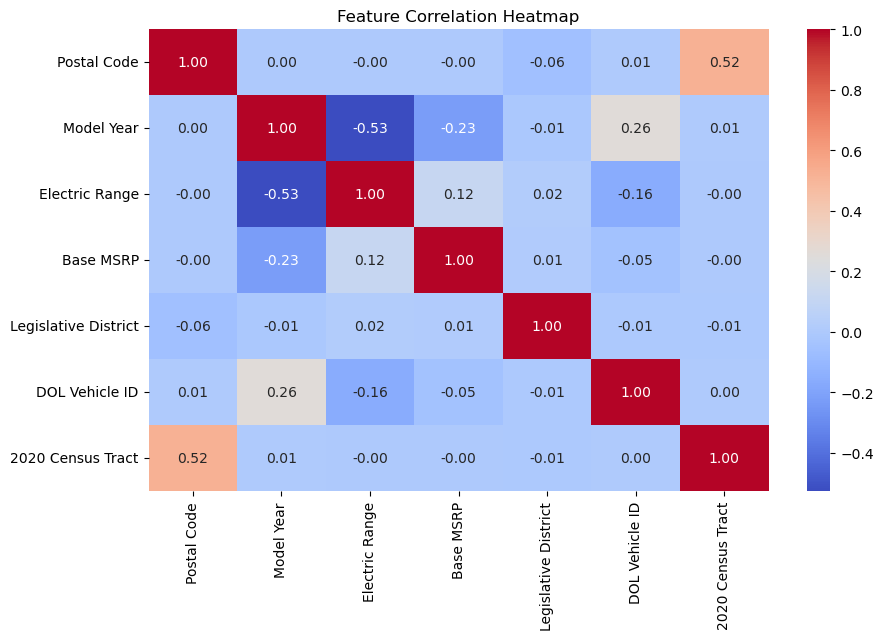

In [42]:
# Visualizing correlation heatmap
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlation Heatmap")
plt.show()

# Analisis Heatmap Korelasi Fitur
1. Korelasi Negatif antara Model Year dan Electric Range (-0.53)
2. Korelasi Positif antara Postal Code dan 2020 Census Tract (0.52)
3. Korelasi Negatif antara Model Year dan Base MSRP (-0.23)
4. Korelasi Positif antara DOL Vehicle ID dan Model Year (0.26)
5. Korelasi Lemah antara Base MSRP dan Electric Range (0.12)

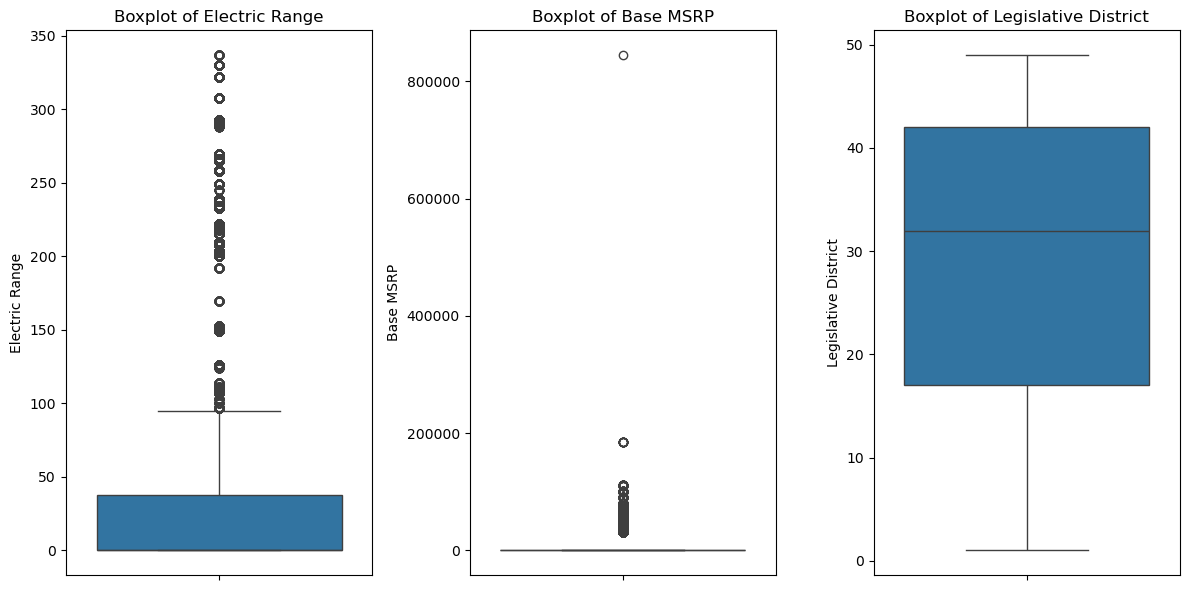

In [45]:
# Deteksi Outlier dengan Boxplot
numerical_cols = ['Electric Range', 'Base MSRP', 'Legislative District']
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, len(numerical_cols), i)
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


# Analisis Boxplot Outlier pada Dataset
1. Electric Range (Jarak Tempuh Listrik)
   - Terlihat banyak outlier di atas batas atas, terutama di kisaran 100-300 mil.
   - Rata-rata data berada di bawah 100 mil, yang menunjukkan bahwa sebagian besar kendaraan listrik dalam dataset ini memiliki jangkauan rendah hingga menengah.
2. Base MSRP (Harga Dasar)
   - Sebagian besar data terkonsentrasi di bawah 200.000 USD.
   - Terdapat outlier ekstrem dengan harga di atas 800.000 USD.
3. Legislative District (Distrik Legislatif)
   - Distribusi terlihat lebih seragam, dengan tidak terlalu banyak outlier.
   - Tidak ada indikasi anomali besar, meskipun data menunjukkan distribusi yang cukup lebar di seluruh distrik legislatif.

In [46]:
# Handling categorical data using Label Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [47]:
# Feature Scaling
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [48]:
# Applying K-Means Clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\ASUS\anacondanew\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\ASUS\anacondanew\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anacondanew\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ASUS\anacondanew\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ASUS\anacondanew\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.Crea

C:\Users\ASUS\anacondanew\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


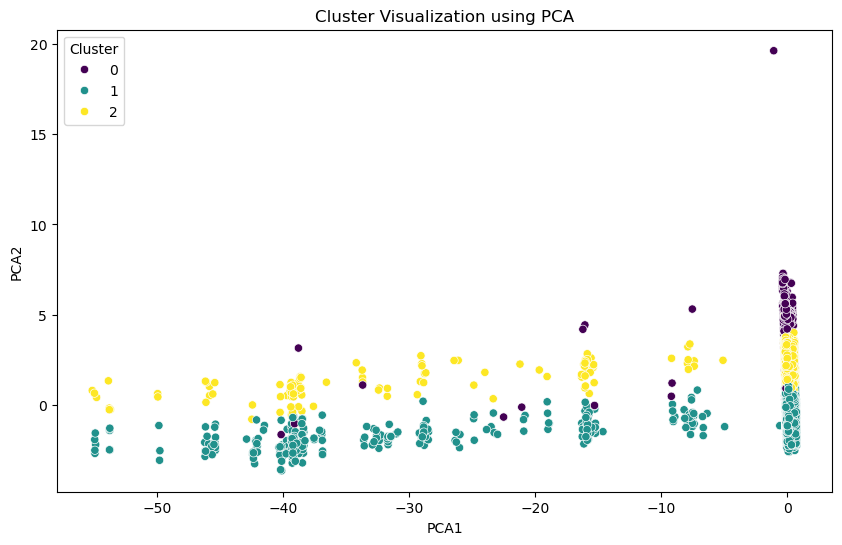

In [49]:
# Visualizing Clusters using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=data, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()

# Analisa Distribusi dan Pemisahan Cluster
- Cluster 1 (Hijau/Tosca) dominan dan tersebar di sebagian besar area.
- Cluster 2 (Kuning) memiliki distribusi cukup luas, menunjukkan bahwa ada beberapa kendaraan dengan karakteristik yang lebih bervariasi.
- Cluster 0 (Ungu) terkonsentrasi di sisi kanan, dengan beberapa titik outlier yang jauh dari yang lain.
- Beberapa titik terlihat tercampur antara cluster, yang mungkin menunjukkan adanya ambiguitas dalam pemisahan data.

In [50]:
# Evaluating Model with Inertia
print("K-Means Inertia:", kmeans.inertia_)

K-Means Inertia: 3309233.867481347
